# Extras de actividad 8

In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import Curves2D
from matplotlib import colors
import matplotlib.ticker as ticker
from scipy import interpolate
from astropy.table import Table

In [2]:
plt.rcParams['text.usetex'] = True

In [3]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 7/' 
# path_win =

In [4]:
path_lin_fig = '/home/ramiro/Facultad/Tesis/Figuras/Actividad 8/'

In [5]:
table   = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat',usecols=['GalaxyID', 'GroupID', 'SnapNum', 'Redshift', 'SubGroupNumber',
       'CentreOfPotential_x', 'CentreOfPotential_y', 'CentreOfPotential_z',
       'Stars_Mass', 'SF_Mass', 'NSF_Mass', 'MassType_DM', 'MassType_BH',
       'HalfMassRad_Star', 'HalfMassRad_Gas', 'HalfMassRad_DM',
       'Stars_Hydrogen', 'Stars_Oxygen', 'Stars_Metallicity', 'SF_Hydrogen',
       'SF_Oxygen', 'SF_Metallicity', 'NSF_Hydrogen', 'NSF_Oxygen',
       'NSF_Metallicity', 'StarFormationRate', 'InitialMassWeightedStellarAge'])

table_b =  pd.read_csv(path_lin+'BlackHoleMass_RefL0100N1504_snap_28.dat',usecols=['GalaxyID','BlackHoleMass'])

DATA_sub = table[(table['Stars_Mass']>=1e10)].copy()

data = pd.read_csv('/home/ramiro/Facultad/Tesis/Datos/Actividad 6/'+'Actividad_5_v2_Parte_2.dat')

DATA = data.copy()

merge_1 = pd.merge(left=DATA_sub,right=DATA, left_on='GalaxyID', right_on='GalaxyID_test')

merge = pd.merge(left=merge_1,right=table_b, left_on='GalaxyID', right_on='GalaxyID')

SF_O  = merge['SF_Oxygen']
SF_H  = merge['SF_Hydrogen']
SF_M  = merge['SF_Mass']
M_Star= merge['Stars_Mass']

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

merge['MDM/Mstar'] = merge['BlackHoleMass']/merge['Stars_Mass']

merge['sf_metalicity'] = 12+np.log10(M_O_SF/(16*M_H_SF))

In [6]:
merge

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,r_sep_1,r_sep_2,mu_1,mu_2,N_1,N_2,N_3,BlackHoleMass,MDM/Mstar,sf_metalicity
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,40.259414,48.797400,0.649263,0.125630,18,35,41,2.491242e+08,0.001619,NaN
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,21.223224,33.711917,0.315459,0.823968,3,3,15,1.143880e+08,0.001504,9.079824
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,13.328678,18.674313,0.120308,0.314345,20,34,40,4.090832e+07,0.000304,9.246274
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,37.490817,56.695098,1.999591,1.722059,2,35,52,2.961948e+07,0.001326,9.050028
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,38.135130,67.823802,0.795587,0.615451,2,34,52,2.840516e+07,0.000588,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,212.966353,260.881095,2.058146,2.369121,0,1,1,3.630704e+06,0.000296,9.085429
3634,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,148.669482,531.640719,2.014763,1.325153,0,1,1,2.257465e+06,0.000206,9.024783
3635,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,167.615303,244.177300,1.657043,0.965701,0,1,2,1.639211e+06,0.000137,9.286851
3636,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,123.996389,183.269247,4.079843,1.619644,0,0,3,1.110667e+06,0.000094,9.115270


## Calculamos los residuos de las galáxias respecto de la media de la metalicidad

In [435]:
mask = (merge['sf_metalicity'].notna())
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [436]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

In [437]:
x      = np.append(10,xmedian)
y      = np.append(ymedian[0],ymedian)

f      = interpolate.interp1d(x, y)
f_err_u= interpolate.interp1d(x, np.append(yerror[1][0],yerror[1]))
f_err_d= interpolate.interp1d(x, np.append(yerror[0][0],yerror[0]))

**Valores continuos de la función interpoladora para la mediana junto con sus errores**

In [438]:
xnew = np.arange(min(x),max(x) , 0.0001)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

y_error_n=[[],[]]
y_error_n[1] = f_err_u(xnew)
y_error_n[0] = f_err_d(xnew)

**Hacemos un scatter plot de la masa vs metalicidad junto con la banda media. Podemos elegir algún parámetro para ver como cambia la distribución.**

In [439]:
parametro ='MassType_DM'

mask = (merge['sf_metalicity'].notna())&(merge[parametro].notna())&(np.log10(merge['Stars_Mass'])<max(x))&(merge['SubGroupNumber']==0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()
zvar = np.log10(merge[parametro]/merge['Stars_Mass'])[mask].to_numpy()

**Separamos las galáxias según su ubucación respecto a la banda media**

In [440]:
gal_sup =[]
gal_inf =[]
gal_mean=[]

for i in np.arange(len(xvar)):
    sup = f(xvar[i]) + f_err_u(xvar[i])- yvar[i]
    inf = f(xvar[i]) - f_err_d(xvar[i])- yvar[i]
    if sup*inf<0:
        gal_mean.append(i)
    elif abs(sup)<abs(inf):
        gal_sup.append(i)
    else: gal_inf.append(i)

In [441]:
residuos = np.ones_like(xvar,dtype=float)

for i in np.arange(len(xvar)):
    residuos[i] = -(f(xvar[i]) - yvar[i])

In [442]:
xvar_sup = np.ones_like(gal_sup,dtype=float)
xvar_inf = np.ones_like(gal_inf,dtype=float)
xvar_mean= np.ones_like(gal_mean,dtype=float)

yvar_sup = np.ones_like(gal_sup,dtype=float)
yvar_inf = np.ones_like(gal_inf,dtype=float)
yvar_mean= np.ones_like(gal_mean,dtype=float)

zvar_sup = np.ones_like(gal_sup,dtype=float)
zvar_inf = np.ones_like(gal_inf,dtype=float)
zvar_mean= np.ones_like(gal_mean,dtype=float)

for i in np.arange(len(gal_sup)):
    xvar_sup[i] = xvar[gal_sup[i]]
    yvar_sup[i] = yvar[gal_sup[i]]
    zvar_sup[i] = zvar[gal_sup[i]]
    
for i in np.arange(len(gal_inf)):
    xvar_inf[i] = xvar[gal_inf[i]]
    yvar_inf[i] = yvar[gal_inf[i]]
    zvar_inf[i] = zvar[gal_inf[i]]
    
for i in np.arange(len(gal_mean)):
    xvar_mean[i] = xvar[gal_mean[i]]
    yvar_mean[i] = yvar[gal_mean[i]]
    zvar_mean[i] = zvar[gal_mean[i]]

In [443]:
xvar = zvar
yvar = residuos

In [444]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

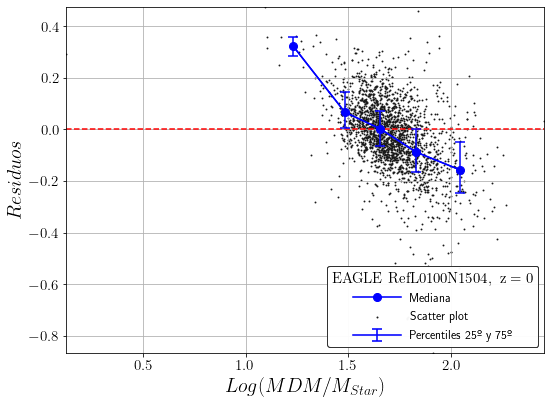

In [445]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(zvar),max(zvar))
ylim=(min(residuos),max(residuos))

xlabel=r'$Log(MDM/M_{Star})$'
ylabel=r'$Residuos$'

ax.set_xlabel(xlabel,fontsize=20)
ax.set_ylabel(ylabel,fontsize=20)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=15)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(zvar,residuos,marker='o',s=0.8,c='0.1',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Mediana')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='',markersize=8,linestyle='-',
           linewidth=1.5,label='Percentiles 25º y 75º',capsize=5,capthick=1.5)

leg1=ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=12)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

# plt.title('Scatter Plots separando según la ubicación de la media.')

ax.add_artist(leg1)

plt.grid()    
plt.hlines(0,xlim[0],xlim[1],colors = 'r',linestyles='dashed')


# plt.savefig(path_lin_fig+'residuos_log(Mstar).png')
plt.show()

## Color Scatter y map de los residuos según la metalicidad

In [446]:
from matplotlib import colors

In [447]:
xvar   = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar   = merge['sf_metalicity'][mask].to_numpy()

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

In [448]:
map_c = {'log(Mstar)':np.log10(merge['Stars_Mass'])[mask].to_numpy(),'metal':merge['sf_metalicity'][mask].to_numpy(),
         'Coloreado':zvar}

In [449]:
map_c = pd.DataFrame(map_c)
map_c_color = Table(data= np.array(map_c),names= map_c.keys())

In [450]:
# Condiciones para seleccionar muestra
# mask=(astro_merge['Stars_Mass']>=1e10)&(astro_merge['sf_metalicity']>0)

data={}
for key in map_c_color.keys():
    data[key] = map_c_color[key]

In [451]:
# Variables (ejes) a graficar
xplot = data['log(Mstar)']
yplot = data['metal']

xlabel= r'$Log(M_{Star})[M_{Sun}]$'
ylabel= r'$12 + Log(O/H) $'

In [452]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data['Coloreado']

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$Log(MDM/M_{Star})(Gal.\ centrales)$'

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-458-528b1eed1f83>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


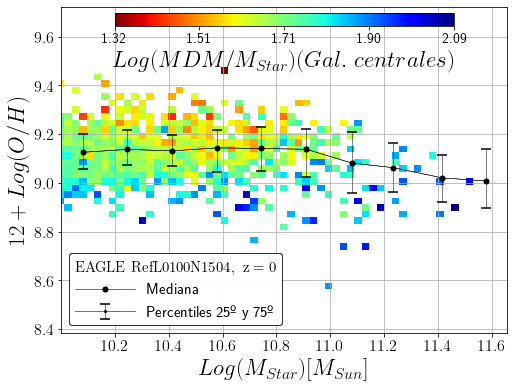

In [458]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=23)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=23)
ax.set_ylabel(ylabel,fontsize=23)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot)+0.1,max(yplot)+0.1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=16)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Percentiles 25º y 75º',capsize=5,capthick=1.5)

leg1=ax.legend(edgecolor='0.1',loc='lower left',handlelength=4,fontsize=15)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

ax.add_artist(leg1)
plt.grid() 

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'map_color_log(mdm_mstar)_(centrales).png')
   
plt.show()

# Scatter

In [29]:
xvar = map_c['R_1'].to_numpy()
yvar = map_c['mu_1'].to_numpy()

In [30]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

In [31]:
xmin=min(xvar)
xmax=max(xvar)
ymin=min(yvar)
ymax=max(yvar)

In [32]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='Residuos(met)'
colors_var_label=r'$Residuos$'
colors_var= map_c[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-32-d8eb4d5a728e>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


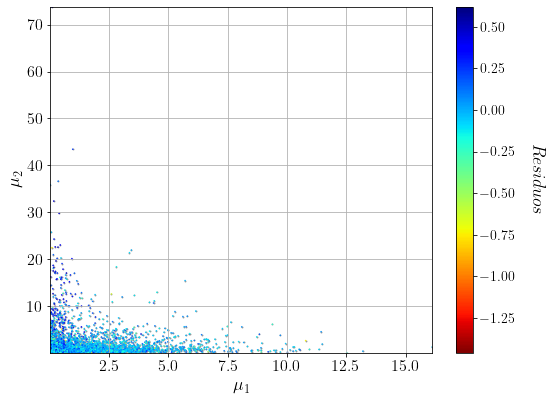

In [33]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin,xmax)
ylim=(ymin,ymax)

xlabel=r'$\mu_{1}$'
ylabel=r'$\mu_{2}$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

# ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

# ax.errorbar(xmedian,ymedian,yerr=yerror,
#            c='k',marker='o',markersize=2,linestyle='--',
#            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.3,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(z_lm).png')
plt.show()